In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import classification_report
import pickle


In [21]:
df = pd.read_csv("ECG-Dataset.csv")
df = df.dropna()

In [22]:
df

,age,sex,smoke,years,ldl,chp,height,weight,fh,active,...,ihd,hr,dm,bpsys,bpdias,htn,ivsd,ecgpatt,qwave,target
0,65,0,0,0,69.0,4,168,111.0,1,0,...,1,98,1,120,80,1,0,4,0,0
1,54,1,0,0,117.0,2,145,81.0,0,0,...,0,85,0,130,80,0,0,4,0,0
2,61,0,1,45,86.2,2,160,72.0,0,0,...,0,63,1,150,70,1,0,2,0,1
3,57,0,0,0,76.0,2,176,78.0,1,0,...,1,74,1,120,70,0,0,3,0,1
4,62,1,0,0,160.0,3,154,61.0,0,0,...,0,89,1,110,70,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,46,1,0,0,111.0,4,143,66.5,0,0,...,0,107,0,150,90,1,1,1,0,0
329,42,0,1,17,164.0,2,164,79.0,1,1,...,0,112,0,110,70,0,0,1,0,0
330,51,0,0,0,116.0,4,180,92.0,0,1,...,0,81,0,105,80,1,0,4,0,0
331,45,1,0,0,102.0,3,166,79.0,0,0,...,0,96,0,110,70,0,0,4,0,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 332
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        333 non-null    int64  
 1   sex        333 non-null    int64  
 2   smoke      333 non-null    int64  
 3   years      333 non-null    int64  
 4   ldl        333 non-null    float64
 5   chp        333 non-null    int64  
 6   height     333 non-null    int64  
 7   weight     333 non-null    float64
 8   fh         333 non-null    int64  
 9   active     333 non-null    int64  
 10  lifestyle  333 non-null    int64  
 11  ihd        333 non-null    int64  
 12  hr         333 non-null    int64  
 13  dm         333 non-null    int64  
 14  bpsys      333 non-null    int64  
 15  bpdias     333 non-null    int64  
 16  htn        333 non-null    int64  
 17  ivsd       333 non-null    int64  
 18  ecgpatt    333 non-null    int64  
 19  qwave      333 non-null    int64  
 20  target    

In [49]:
df.shape

(333, 21)

In [50]:
df.columns

Index(['age', 'sex', 'smoke', 'years', 'ldl', 'chp', 'height', 'weight', 'fh',
       'active', 'lifestyle', 'ihd', 'hr', 'dm', 'bpsys', 'bpdias', 'htn',
       'ivsd', 'ecgpatt', 'qwave', 'target'],
      dtype='object')

In [51]:
df.describe()

,age,sex,smoke,years,ldl,chp,height,weight,fh,active,...,ihd,hr,dm,bpsys,bpdias,htn,ivsd,ecgpatt,qwave,target
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,...,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,55.117117,0.534535,0.195195,4.798799,112.926246,2.885886,162.102102,82.157357,0.237237,0.369369,...,0.255255,83.882883,0.231231,123.618619,74.879880,0.516517,0.282282,3.315315,0.078078,0.354354
std,14.159210,0.499557,0.396947,11.249835,37.972983,1.032110,11.295127,15.392197,0.426029,0.483360,...,0.436661,14.633107,0.422254,21.341639,12.681834,0.500479,0.450787,0.981596,0.268698,0.479037
min,20.000000,0.000000,0.000000,0.000000,26.000000,1.000000,128.000000,41.000000,0.000000,0.000000,...,0.000000,40.000000,0.000000,80.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,0.000000,86.200000,2.000000,153.000000,72.000000,0.000000,0.000000,...,0.000000,74.000000,0.000000,110.000000,70.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,57.000000,1.000000,0.000000,0.000000,110.000000,3.000000,162.000000,81.000000,0.000000,0.000000,...,0.000000,84.000000,0.000000,120.000000,70.000000,1.000000,0.000000,4.000000,0.000000,0.000000
75%,67.000000,1.000000,0.000000,0.000000,137.000000,4.000000,171.000000,90.300000,0.000000,1.000000,...,1.000000,91.000000,0.000000,135.000000,80.000000,1.000000,1.000000,4.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,50.000000,260.000000,4.000000,192.000000,134.000000,1.000000,1.000000,...,1.000000,140.000000,1.000000,220.000000,140.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [52]:
df.isnull

<bound method DataFrame.isnull of      age  sex  smoke  years    ldl  chp  height  weight  fh  active  ...  ihd  \
0     65    0      0      0   69.0    4     168   111.0   1       0  ...    1   
1     54    1      0      0  117.0    2     145    81.0   0       0  ...    0   
2     61    0      1     45   86.2    2     160    72.0   0       0  ...    0   
3     57    0      0      0   76.0    2     176    78.0   1       0  ...    1   
4     62    1      0      0  160.0    3     154    61.0   0       0  ...    0   
..   ...  ...    ...    ...    ...  ...     ...     ...  ..     ...  ...  ...   
328   46    1      0      0  111.0    4     143    66.5   0       0  ...    0   
329   42    0      1     17  164.0    2     164    79.0   1       1  ...    0   
330   51    0      0      0  116.0    4     180    92.0   0       1  ...    0   
331   45    1      0      0  102.0    3     166    79.0   0       0  ...    0   
332   68    1      0      0   92.0    2     165    80.0   1       0  ...   

In [53]:
df.isnull().sum()

age          0
sex          0
smoke        0
years        0
ldl          0
chp          0
height       0
weight       0
fh           0
active       0
lifestyle    0
ihd          0
hr           0
dm           0
bpsys        0
bpdias       0
htn          0
ivsd         0
ecgpatt      0
qwave        0
target       0
dtype: int64

In [54]:
df.corr()

,age,sex,smoke,years,ldl,chp,height,weight,fh,active,...,ihd,hr,dm,bpsys,bpdias,htn,ivsd,ecgpatt,qwave,target
age,1.000000,-0.048905,-0.148775,0.006029,-0.144050,-0.069160,-0.218374,-0.062325,-0.146928,-0.203505,...,0.255785,-0.170864,0.188408,0.203131,0.069691,0.402458,0.301541,-0.224148,0.075175,0.286507
sex,-0.048905,1.000000,-0.375861,-0.347401,0.090844,-0.068278,-0.708992,-0.118695,-0.059841,-0.271282,...,-0.102669,0.079873,0.012007,-0.070380,-0.065905,0.157339,-0.110297,-0.006917,-0.087467,-0.013532
smoke,-0.148775,-0.375861,1.000000,0.867461,0.032217,0.003069,0.369732,0.062200,-0.007488,0.062653,...,0.007097,0.057358,-0.036480,-0.048074,-0.046187,-0.220958,-0.005864,-0.050212,0.054360,0.046997
years,0.006029,-0.347401,0.867461,1.000000,0.019897,0.035631,0.323179,0.053439,-0.051600,0.027556,...,0.054634,0.046569,0.024407,0.020731,-0.016954,-0.106135,0.069439,-0.079612,0.059020,0.058542
ldl,-0.144050,0.090844,0.032217,0.019897,1.000000,-0.049712,0.005518,0.206904,-0.036281,-0.103263,...,-0.147642,0.133025,-0.011267,0.025435,0.051811,-0.052415,-0.057567,-0.026607,-0.081580,-0.055035
chp,-0.069160,-0.068278,0.003069,0.035631,-0.049712,1.000000,0.051127,-0.015627,-0.040998,0.030406,...,-0.048790,0.070510,0.019260,0.055724,-0.045924,-0.060482,-0.047086,-0.053569,0.032224,-0.027625
height,-0.218374,-0.708992,0.369732,0.323179,0.005518,0.051127,1.000000,0.302381,0.153939,0.288780,...,-0.049270,-0.034425,-0.071276,0.008521,0.071369,-0.170803,0.006745,0.066634,0.088670,-0.089651
weight,-0.062325,-0.118695,0.062200,0.053439,0.206904,-0.015627,0.302381,1.000000,0.043116,-0.212324,...,-0.003036,0.012095,0.022191,0.086910,0.161700,0.054089,0.236631,0.046226,0.088128,-0.084751
fh,-0.146928,-0.059841,-0.007488,-0.051600,-0.036281,-0.040998,0.153939,0.043116,1.000000,0.099753,...,0.272576,-0.111004,-0.021219,-0.121206,-0.050459,-0.039622,-0.130180,-0.092985,0.179761,0.059124
active,-0.203505,-0.271282,0.062653,0.027556,-0.103263,0.030406,0.288780,-0.212324,0.099753,1.000000,...,0.008614,-0.045393,-0.168849,-0.134340,-0.027136,-0.193383,-0.120551,0.204519,-0.083572,-0.202743


Text(0.5, 1.0, 'Corrletion Matrix')

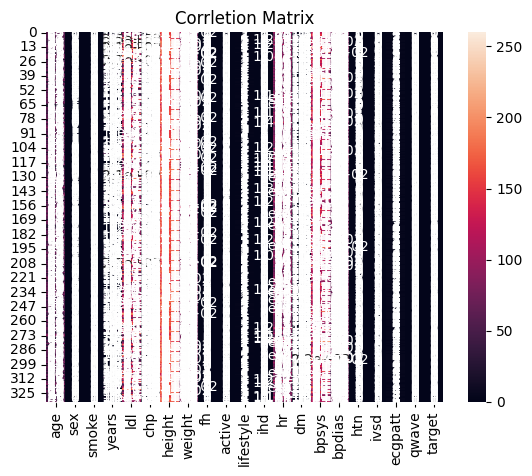

In [56]:
sns.heatmap(df, annot=True)
plt.title("Corrletion Matrix")

<AxesSubplot:>

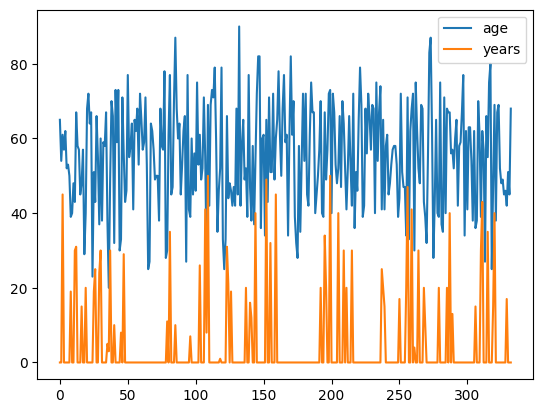

In [58]:
df[['age', 'years']].plot()

<AxesSubplot:>

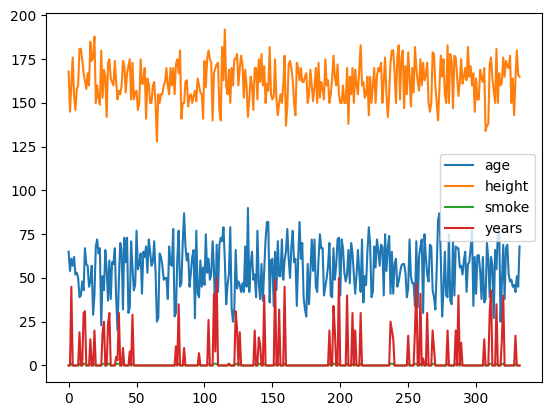

In [59]:
df[['age', 'height', 'smoke', 'years']].plot()

In [23]:
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

In [24]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 20, 50)            10400     
                                                                 
 dropout_3 (Dropout)         (None, 20, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 20, 50)            20200     
                                                                 
 dropout_4 (Dropout)         (None, 20, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
7/8 [=========================>....] - ETA: 0s - loss: 0.6850 - accuracy: 0.6250WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001E7D9577950> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

Epoch 46/50
8/8 [==============================] - 0s 40ms/step - loss: 0.4519 - accuracy: 0.8026 - val_loss: 0.6215 - val_accuracy: 0.7000
Epoch 47/50
8/8 [==============================] - 0s 45ms/step - loss: 0.4383 - accuracy: 0.7983 - val_loss: 0.6543 - val_accuracy: 0.7500
Epoch 48/50
8/8 [==============================] - 0s 35ms/step - loss: 0.4305 - accuracy: 0.7983 - val_loss: 0.7020 - val_accuracy: 0.6500
Epoch 49/50
8/8 [==============================] - 0s 35ms/step - loss: 0.4224 - accuracy: 0.8197 - val_loss: 0.6799 - val_accuracy: 0.7400
Epoch 50/50
8/8 [==============================] - 0s 44ms/step - loss: 0.4152 - accuracy: 0.8155 - val_loss: 0.6835 - val_accuracy: 0.6800


In [31]:
predictions = (model.predict(X_test) > 0.5).astype(int)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4/4 [==============================] - 2s 11ms/step


In [43]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4/4 [==============================] - 3s 13ms/step - loss: 0.0000e+00 - accuracy: 0.6800
Test Loss: [0.0, 0.6800000071525574]


In [46]:
target_names = le.classes_.astype('str').tolist()

In [47]:
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77        62
           1       0.62      0.39      0.48        38

    accuracy                           0.68       100
   macro avg       0.66      0.62      0.63       100
weighted avg       0.67      0.68      0.66       100

